<a href="https://colab.research.google.com/github/rosanahjk/testPublico/blob/main/Desaf%C3%ADo_Final_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**DIPLOMATURA EN DATA SCIENCE PARA LA TOMA DE DECISIONES-Curso de Python**

**2024**

---Desafio final Python

Esta notebook tiene como objetivo realizar EDA . Exploraremos librerías, paquetes y funciones esenciales que facilitarán la manipulación y el procesamiento de datos, ayudándonos a comprender mejor cómo analizar y describir conjuntos de datos.
Recuerda realizar un análisis exploratorio de datos (EDA) utilizando Pandas. Debes manejar, limpiar, analizar y visualizar el conjunto de datos proporcionado, como en el desafio 2

Consignas:

* Elegir un problema de aprendizaje automático: puede ser un problema de regresión, clasificación o clustering. Justifica la elección.
Preprocesar los datos: Realizar cualquier limpieza y transformación necesaria en el conjunto de datos.
* Construir y entrenar el modelo: Implementa un algoritmo de aprendizaje automático adecuado para el problema (por ejemplo, regresión lineal, regresión logística, k-means, etc.).
* Evaluar el modelo: Utiliza métricas de evaluación apropiadas (precisión, recall, F1-score, curva ROC, AUC, etc.) para medir el rendimiento del modelo. Aplica validación cruzada si es necesario.
* Optimización de hiperparámetros: Si el modelo lo permite, utiliza GridSearchCV o RandomizedSearchCV para encontrar los mejores hiperparámetros.
* Documentar y visualizar: Presenta los hallazgos mediante gráficos y visualizaciones que ayuden a entender el rendimiento del modelo y cualquier patrón interesante en los datos.


In [1]:
# Limpieza de datos, escalado y estandarización
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Visualización y uso de datos
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


# Modelos de aprendizaje y selección de parámetros
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from scipy.stats import randint
import xgboost as xgb

# Métricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Leer dataset Predicción de Diabetes -

El conjunto de datos de Kaggle para la predicción de diabetes contiene información médica y demográfica de pacientes, junto con su diagnóstico de diabetes (positivo o negativo). Incluye variables como la edad, el sexo, el índice de masa corporal (IMC), hipertensión, enfermedades cardíacas, historial de tabaquismo, niveles de HbA1c y glucosa en sangre. Este dataset es útil para construir modelos de aprendizaje automático que predigan la diabetes basándose en el historial médico y la información demográfica de los pacientes. Puede ayudar a los profesionales de la salud a identificar pacientes en riesgo y desarrollar tratamientos personalizados, así como a los investigadores a explorar las relaciones entre factores médicos y la probabilidad de desarrollar diabetes.
Acá un poco más del dataset [Predicción de diabetes](https://www.kaggle.com/code/octavioberruti/prediccion-de-diabetes-eda-random-forest-95)

In [28]:
# Cargar el conjunto de datos en un dataframe de Pandas
url = "https://github.com/yiranamejia/Prediccion-de-Diabetes/raw/main/diabetes_prediction_dataset%5B1%5D.csv"
df= pd.read_csv(url)


# Describe los atributos del dataset

# Un poco del dataset, exploracion y atributos

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
# obtenemos lista de valores únicos o un array(matriz) de cada columna, o sea los valores distintos que aparecen en cada columna
for column in df.columns:
    unique_values = df[column].unique()
    total_unique = len(unique_values)
    print(f"En la columna '{column}':")
    print(unique_values)
    print(f"Total de valores únicos: {total_unique}\n")

En la columna 'gender':
['Female' 'Male' 'Other']
Total de valores únicos: 3

En la columna 'age':
[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
Total de valores únicos: 102

En la columna 'hypertension':
[0 1]
Total de valores únicos: 2

En la columna 'heart_disease':
[1 0]
Total de valores únicos: 2

En la columna 'smoking_history':
['never' 'No Info' 'current' 'former' 'ever' 'not current']
Total de valores únicos: 6

En la col

In [7]:
# @title
# Revisión de valores nulos en df_unido con la función isnull().sum()
# La función isnull() identifica los valores nulos en el DataFrame,
# y la función sum() cuenta la cantidad de valores nulos por cada columna.
print("Valores nulos en df1_personas:")
print(df.isnull().sum())
print("\n")


#comentarios: Solo dos culumnas estan presentando valores nulos

Valores nulos en df1_personas:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64




In [11]:
#Manejamos los valores duplicados
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

# Eliminar las filas duplicadas del DataFrame original
df = df.drop_duplicates()

# Verificar si se eliminaron
print("Tamaño del DataFrame después de eliminar duplicados:", df.shape)

number of duplicate rows:  (3854, 9)
Tamaño del DataFrame después de eliminar duplicados: (96146, 9)


In [29]:
#Removemos el valor extraño en la variable "gender"
df['gender'].unique()

df = df[df['gender'] != 'Other']

# Seleccionando atributos de interes
incluye variables como la edad, el sexo, el índice de masa corporal (IMC), hipertensión, enfermedades cardíacas, historial de tabaquismo, niveles de HbA1c y glucosa en sangre.
predigan la diabetes basándose en el historial médico y la información demográfica de los pacientes



# Histograma para Age

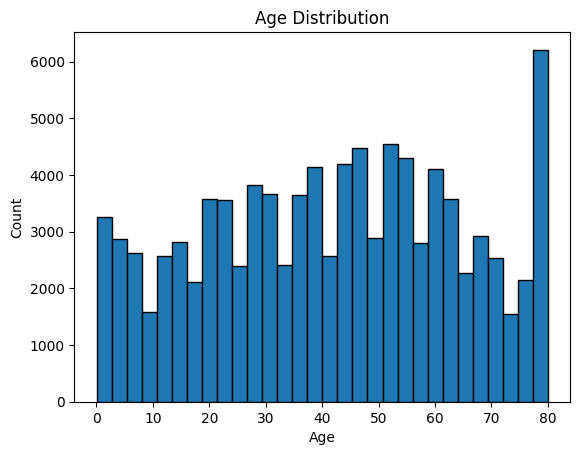

In [13]:
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#Diagrama de barras para Gender

<ipython-input-14-8bed4ef93e0b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='Set2')


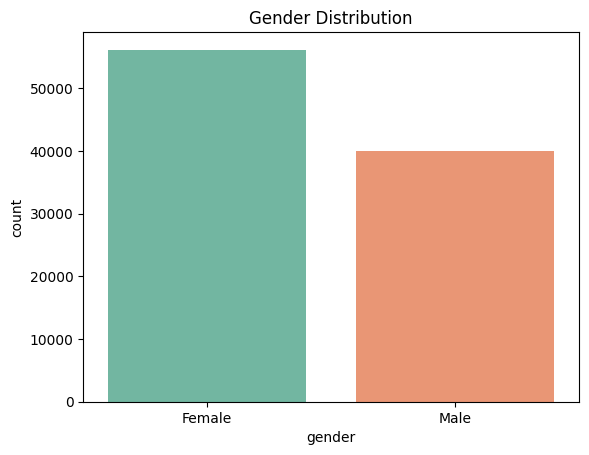

In [14]:
sns.countplot(x='gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.show()

# Grafico de distribucion para BMI

<ipython-input-15-cb9bd891b126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], bins=30)


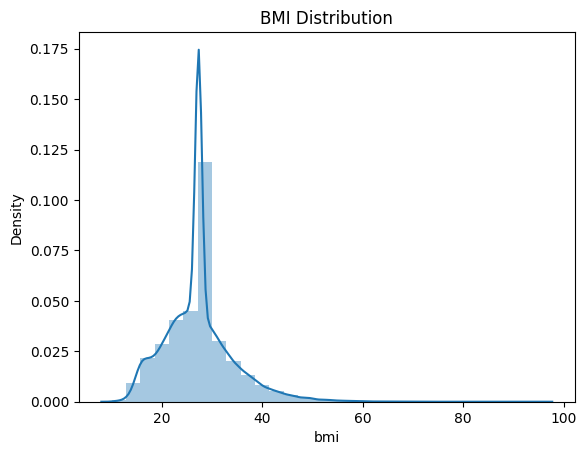

In [15]:
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

# Graficos para variables binarias

<ipython-input-16-30e73ee90a0d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


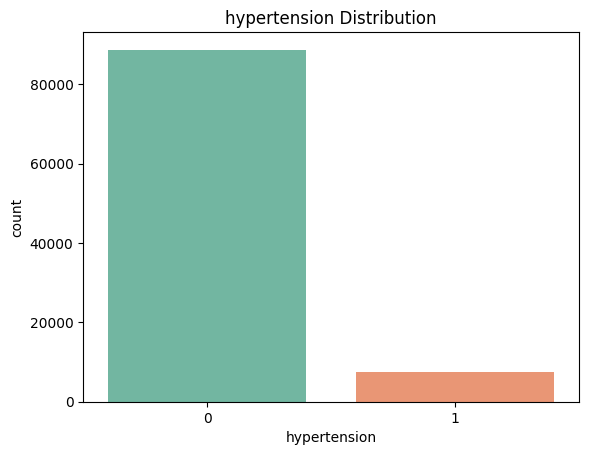

<ipython-input-16-30e73ee90a0d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


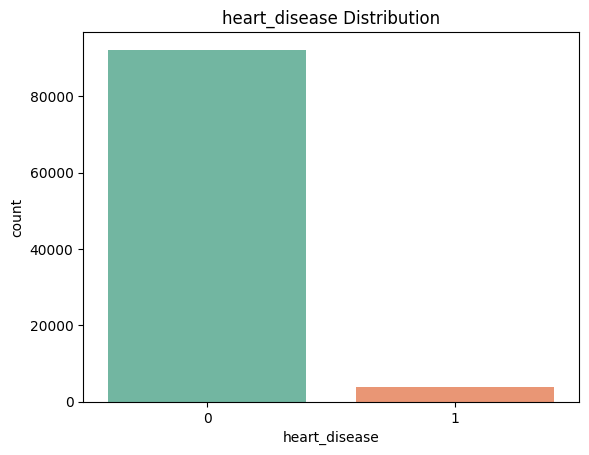

<ipython-input-16-30e73ee90a0d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


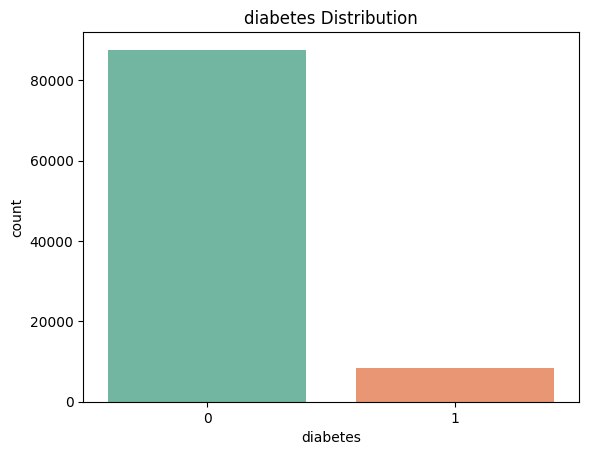

In [16]:
for col in ['hypertension','heart_disease','diabetes']:
  sns.countplot(x=col, data=df, palette='Set2')
  plt.title(f'{col} Distribution')
  plt.show()

# Grafico para smoking history

<ipython-input-17-c02c7df2701b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_history', data=df, palette='Set2')


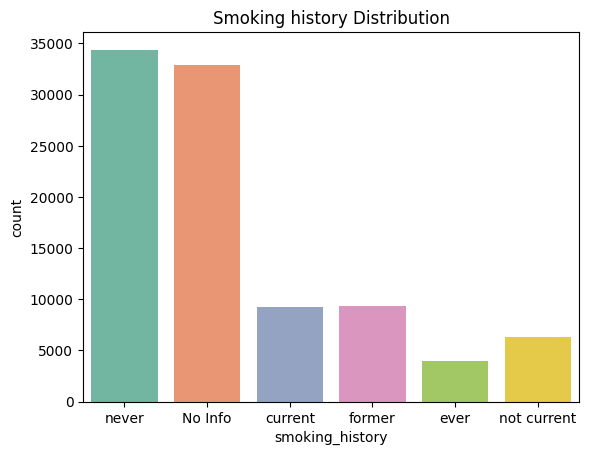

In [17]:
sns.countplot(x='smoking_history', data=df, palette='Set2')
plt.title('Smoking history Distribution')
plt.show()

# hacer una copia


In [31]:
data = df.copy()

# ver el equilibrio de la variable dependiente


In [37]:
# Calcula el porcentaje de cada variable de la columna dependiente
class_counts = data['diabetes'].value_counts(normalize=True) * 100
print("Porcentaje de cada clase:")
print(class_counts)

#el conjunto de datos está desbalanceado
 # (con un 9% de casos positivos para la diabetes y un 91% de casos negativos)

Porcentaje de cada clase:
diabetes
0    91.49847
1     8.50153
Name: proportion, dtype: float64


# Encoder

In [32]:
def perform_one_hot_encoding(df, column_name):
  #Realizamos el encoding sobre columnas especificas para darle valores cdificado a las categorpias
  # y se crean nuevas columnas

  dummies = pd.get_dummies(df[column_name], prefix=column_name)

  #Eliminamos las columnas originales y acomplamos las nuevas

  df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

  return df

#Aplicamos la funcion sobre la variable "gender"

data = perform_one_hot_encoding(data, 'gender')

#Aplicamos la funcion sobre la variable "smoking_history" y  se crearán tantas columnas como categorías únicas existan en los datos.

data = perform_one_hot_encoding(data, 'smoking_history')

#Matriz de Correlación

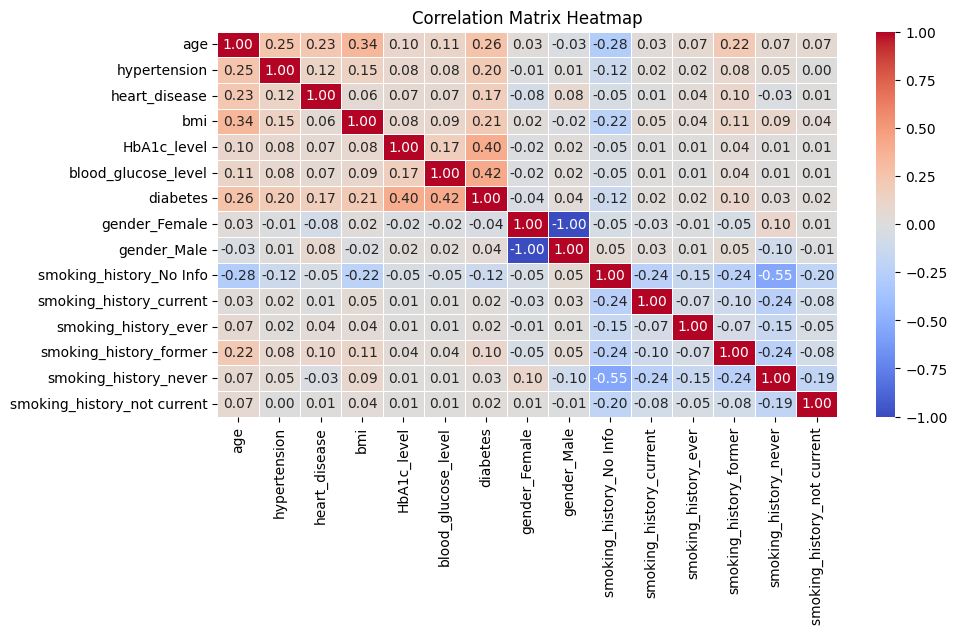

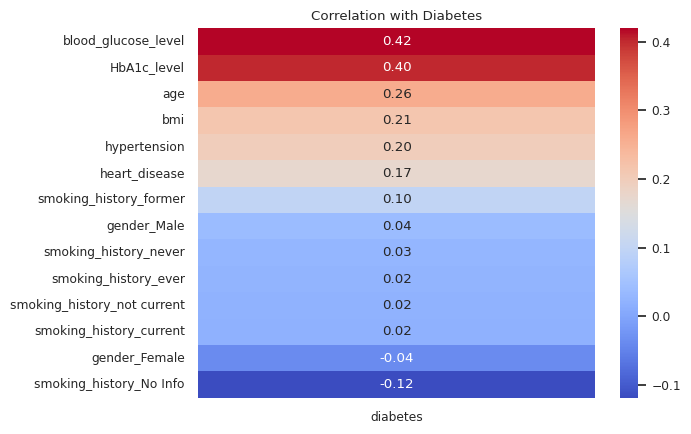

In [33]:
#Realizamos la matriz de correlación

correlation_matrix = data.corr()

#Grafico I

plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

#Grafico II
#Se ordenan las correlaciones en orden descendente para facilitar la interpretación. Esto permite ver
#qué variables están más correlacionadas (positiva o negativamente) con la diabetes

corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')


#Se ordenan las correlaciones en orden descendente para facilitar
#la interpretación. Esto permite ver qué variables están más correlacionadas
#positiva o negativamente) con la diabetes

target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

# Análisis de Predicción